In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

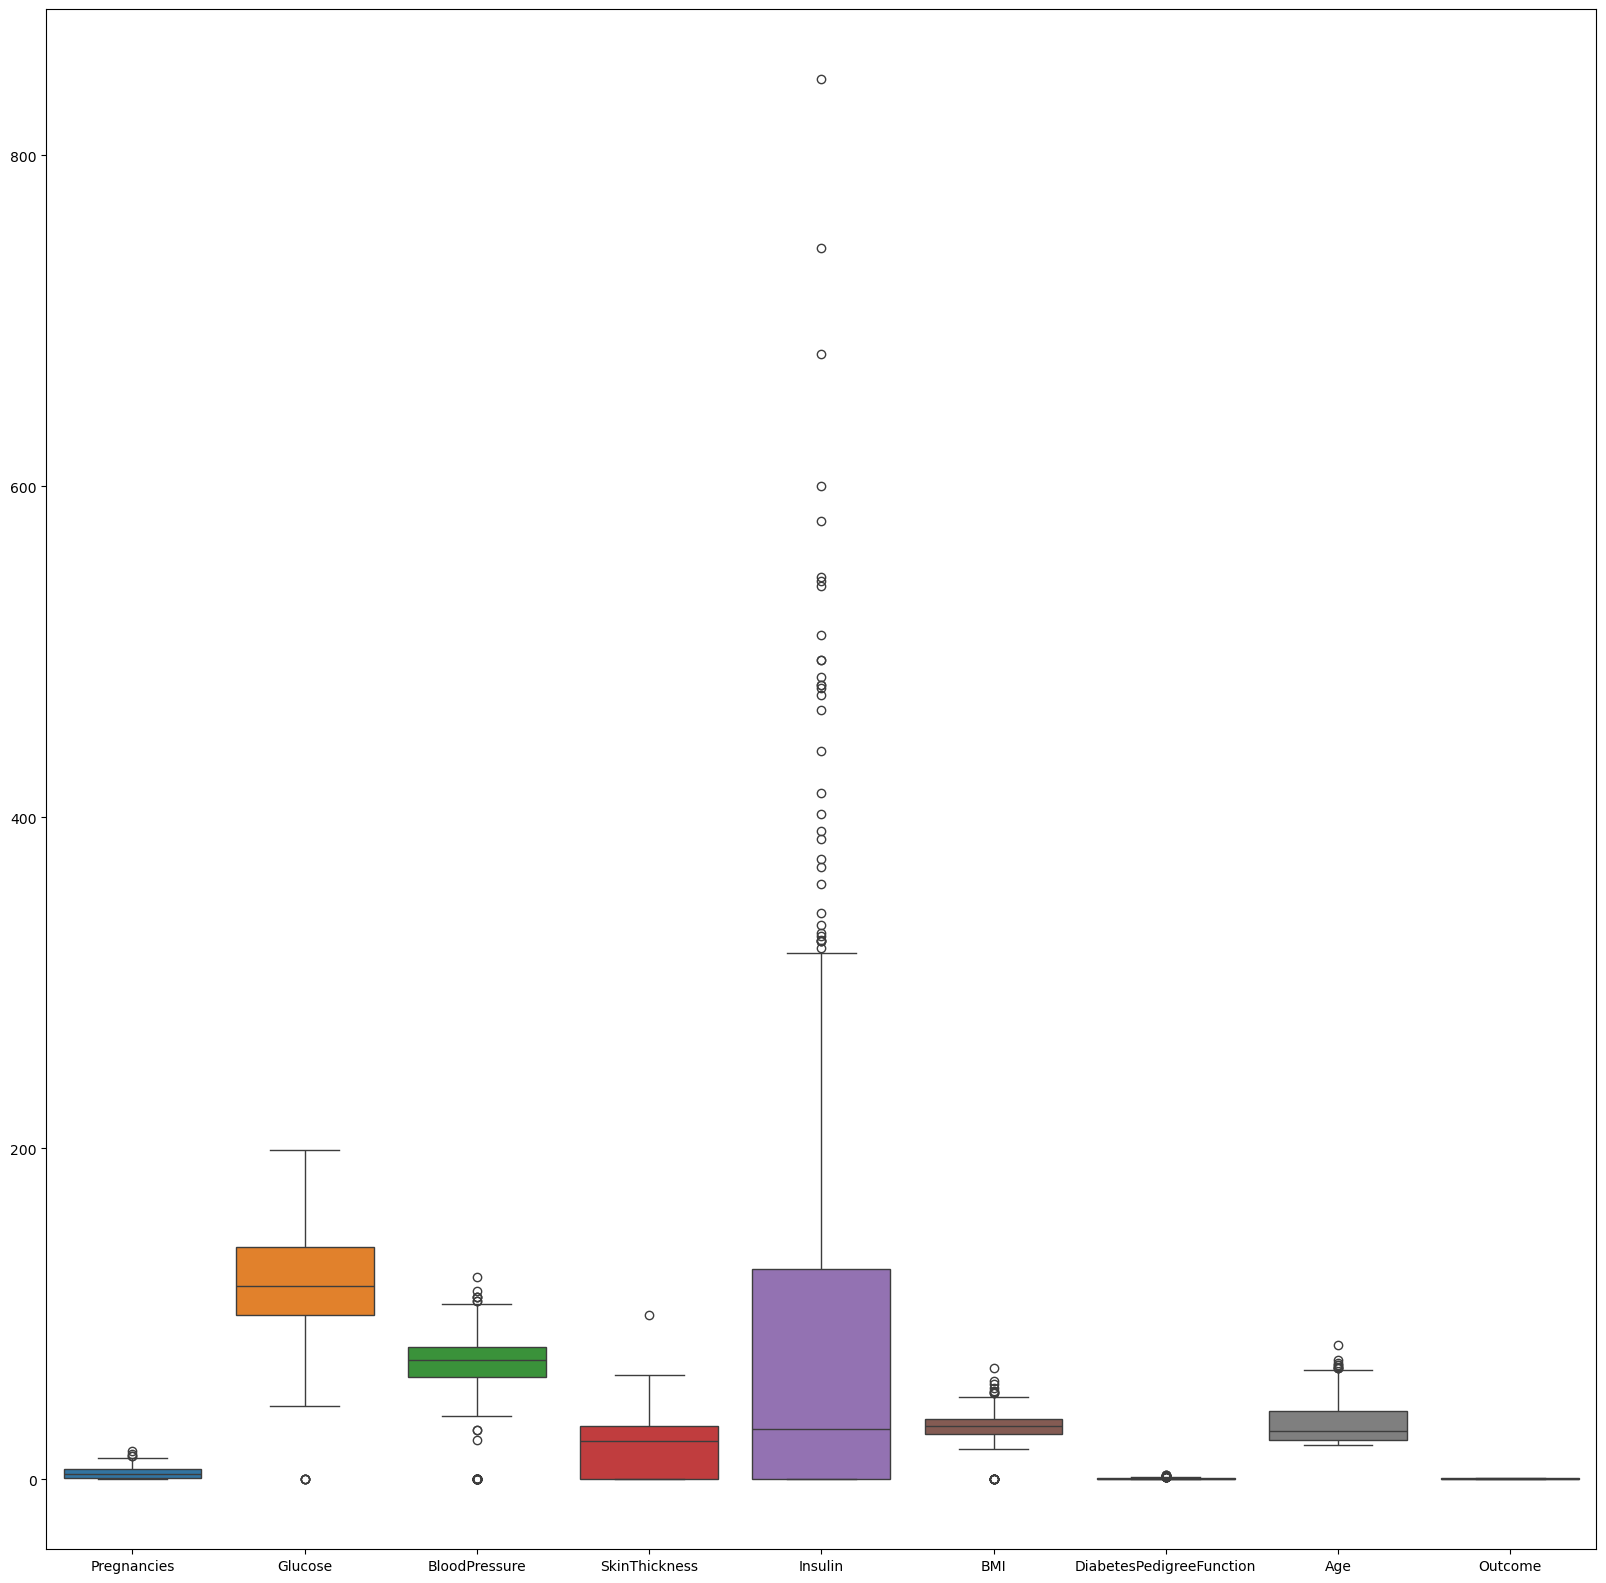

In [6]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= diabetes,ax=ax)

<Axes: xlabel='BloodPressure'>

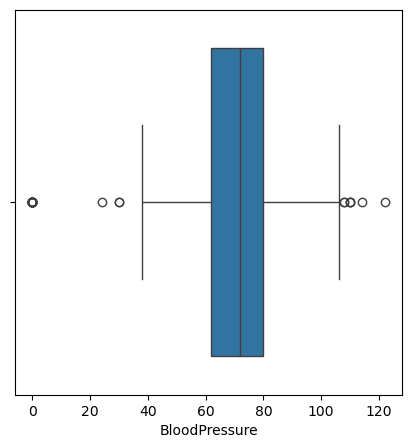

In [7]:
fig,ax= plt.subplots(figsize=(5,5))
sns.boxplot(x=diabetes["BloodPressure"],ax=ax)

In [8]:
Q1 = diabetes['Glucose'].quantile(0.25)
Q3 = diabetes['Glucose'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['Glucose']>= lower_bound)&(diabetes['Glucose'] <= upper_bound)]

<Axes: xlabel='Glucose'>

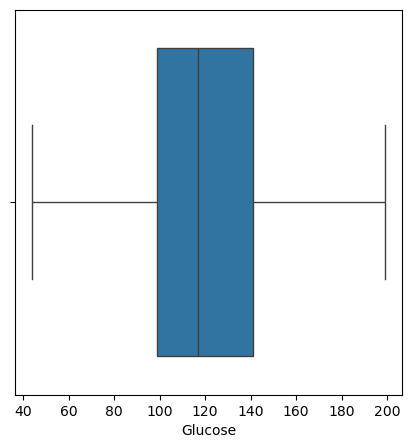

In [9]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Glucose'],ax=ax)

In [10]:
Q1 = diabetes['Pregnancies'].quantile(0.25)
Q3 = diabetes['Pregnancies'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['Pregnancies']>= lower_bound)&(diabetes['Pregnancies'] <= upper_bound)]

<Axes: xlabel='Pregnancies'>

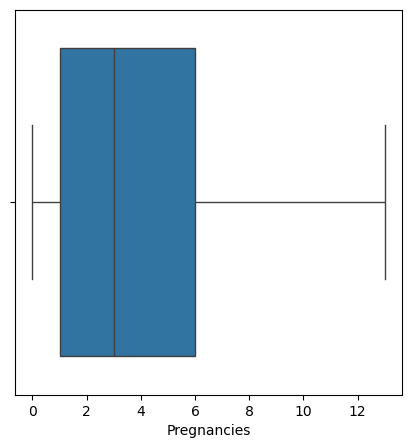

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Pregnancies'],ax=ax)

In [12]:
Q1 = diabetes['BloodPressure'].quantile(0.25)
Q3 = diabetes['BloodPressure'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['BloodPressure']>= lower_bound)&(diabetes['BloodPressure'] <= upper_bound)]

<Axes: xlabel='BloodPressure'>

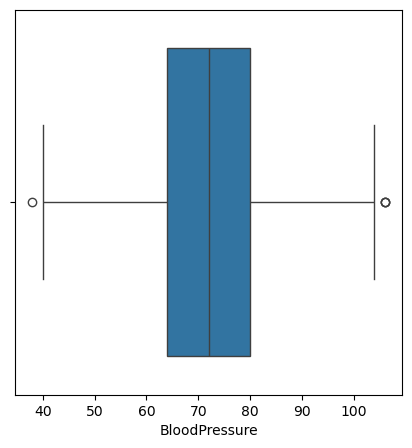

In [13]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['BloodPressure'],ax=ax)

In [14]:
Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['Insulin']>= lower_bound)&(diabetes['Insulin'] <= upper_bound)]

<Axes: xlabel='Insulin'>

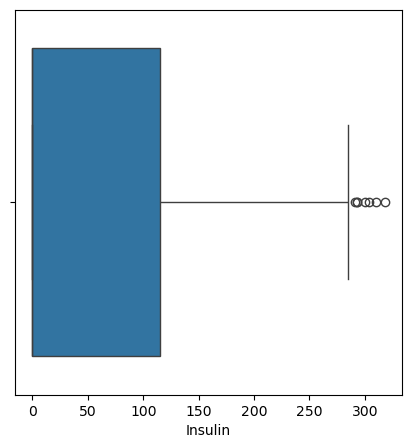

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Insulin'],ax=ax)

In [16]:
Q1 = diabetes['SkinThickness'].quantile(0.25)
Q3 = diabetes['SkinThickness'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['SkinThickness']>= lower_bound)&(diabetes['SkinThickness'] <= upper_bound)]

<Axes: xlabel='SkinThickness'>

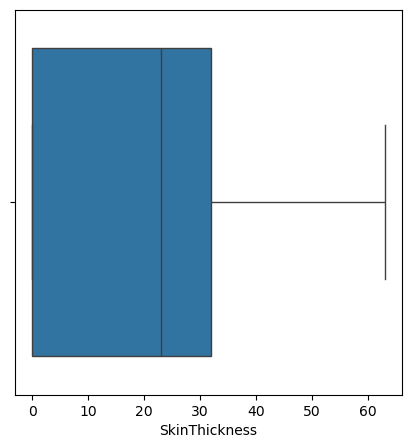

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['SkinThickness'],ax=ax)

In [18]:
Q1 = diabetes['BMI'].quantile(0.25)
Q3 = diabetes['BMI'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['BMI']>= lower_bound)&(diabetes['BMI'] <= upper_bound)]

<Axes: xlabel='BMI'>

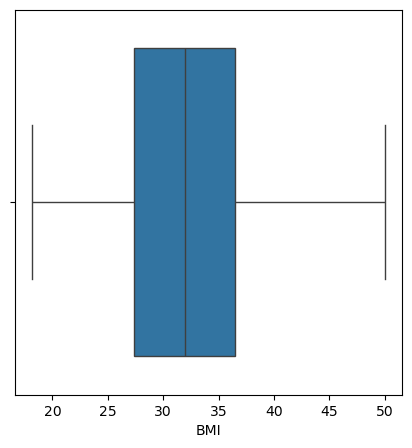

In [19]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['BMI'],ax=ax)

In [20]:
Q1 = diabetes['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = diabetes['DiabetesPedigreeFunction'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['DiabetesPedigreeFunction']>= lower_bound)&(diabetes['DiabetesPedigreeFunction'] <= upper_bound)]

<Axes: xlabel='DiabetesPedigreeFunction'>

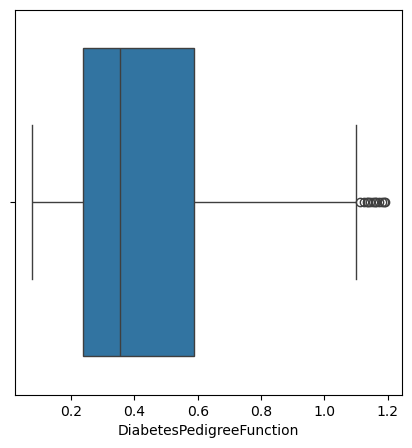

In [21]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['DiabetesPedigreeFunction'],ax=ax)

In [22]:
Q1 = diabetes['Age'].quantile(0.25)
Q3 = diabetes['Age'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
newdata= diabetes[(diabetes['Age']>= lower_bound)&(diabetes['Age'] <= upper_bound)]

<Axes: xlabel='Age'>

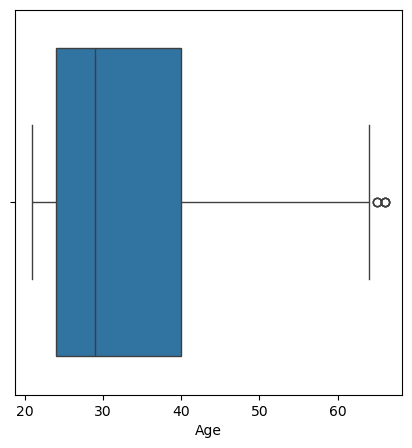

In [23]:
fig,ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['Age'],ax=ax)

In [3]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)

#Calculate the IQR
IQR = Q3-Q1

#Define the outlier boundaries
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

#Create a mask for data within the IQR boundaries
mask = ~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)

#Remove outliers
cleaned_data = diabetes[mask]

NameError: name 'diabetes' is not defined

<Axes: >

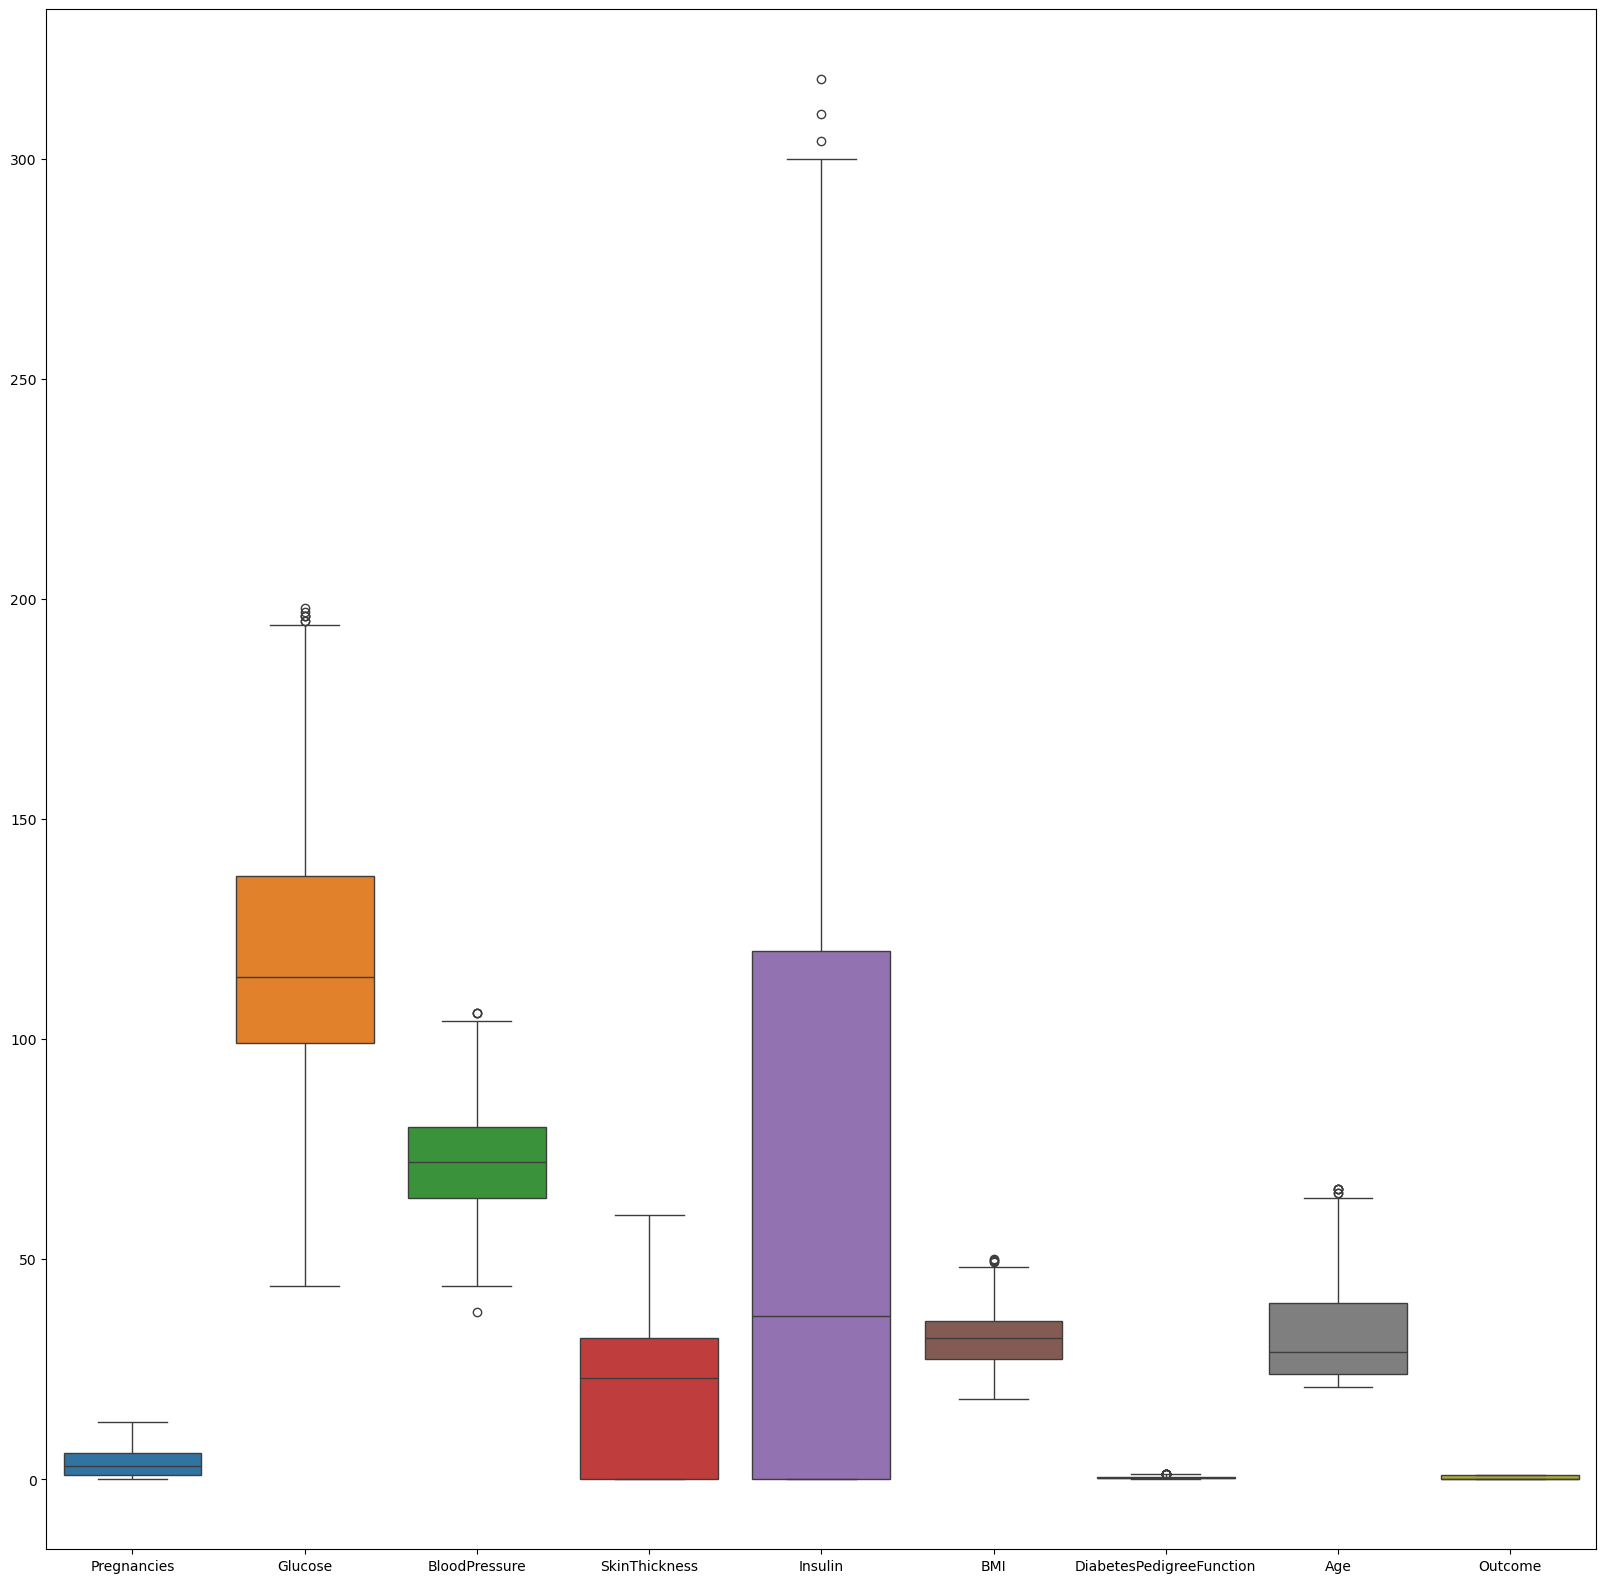

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(cleaned_data, ax=ax)

In [26]:
correlation = cleaned_data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


<Axes: >

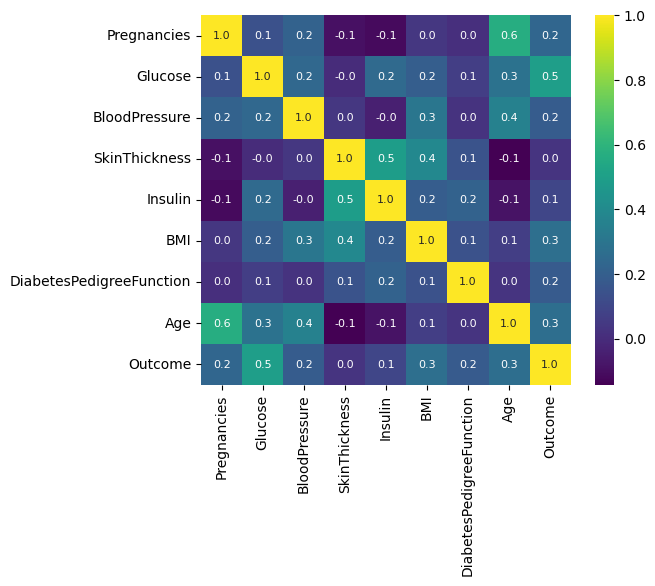

In [27]:
sns.heatmap(correlation, cbar= True, square= True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap ='viridis')

In [28]:
cleaned_data['Outcome'].value_counts()

Outcome
0    439
1    200
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

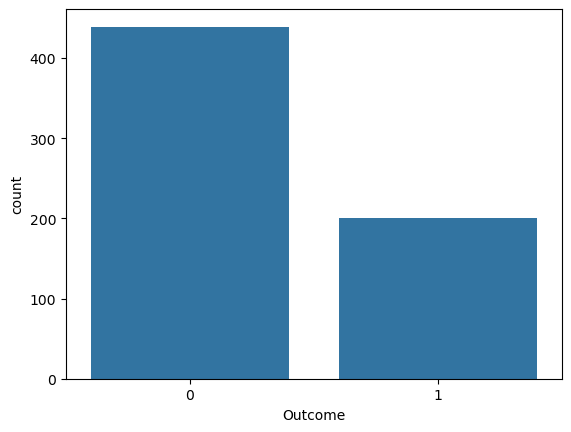

In [29]:
sns.countplot(x='Outcome',data= cleaned_data)

In [30]:
x= cleaned_data.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [31]:
y = cleaned_data['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
#SYNTHETIC MINOIRTY OVERSAMPLING TECHNIQUES - SMOTE


In [33]:
smote=SMOTE()
x_resampled, y_resampled=smote.fit_resample(x,y)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state=42)

In [35]:
x_resampled.shape,x_train.shape,x_test.shape, y_resampled.shape, y_train.shape, y_test.shape

((878, 8), (614, 8), (264, 8), (878,), (614,), (264,))

In [36]:
model= LogisticRegression()

In [37]:
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of trainingdata',train_data_accuracy)

Accuracy of trainingdata 0.742671009771987


In [39]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of testingdata',test_data_accuracy)

Accuracy of testingdata 0.7537878787878788


In [88]:
cm = confusion_matrix(test_data_predict,y_test)
cm

array([[110,  42],
       [ 23,  89]], dtype=int64)

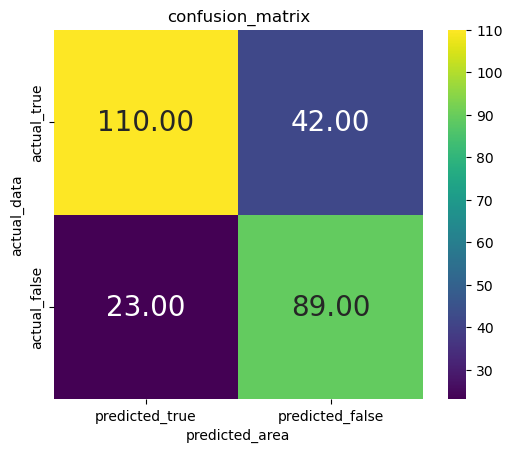

In [90]:
sns.heatmap(cm,annot= True, annot_kws= {'size':20}, fmt = '.2f', cmap = 'viridis', square = True,
            xticklabels = ['predicted_true','predicted_false'],
            yticklabels = ['actual_true','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')
plt.show()

In [92]:
print(classification_report(test_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       152
           1       0.68      0.79      0.73       112

    accuracy                           0.75       264
   macro avg       0.75      0.76      0.75       264
weighted avg       0.76      0.75      0.76       264



In [106]:
new_data = (8,	183,	64,	0,	0,	23.3,	0.672,	32)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')

1


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
